# Disease Prediction Using Machine Learning

## 1. Introduction
This project uses **Machine Learning (Decision Tree & Random Forest)** to predict diseases based on **patient symptoms**.  
Dataset: [Kaggle – Disease Prediction Using Machine Learning](https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning)  

- **132 features (symptoms)**
- **42 disease classes (target: `prognosis`)**


2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


3. Load Dataset

In [3]:
# Load dataset (download from Kaggle and place inside 'data' folder)
df = pd.read_csv("Training.csv")
df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


<Axes: title={'center': 'Disease Class Distribution'}, xlabel='prognosis'>

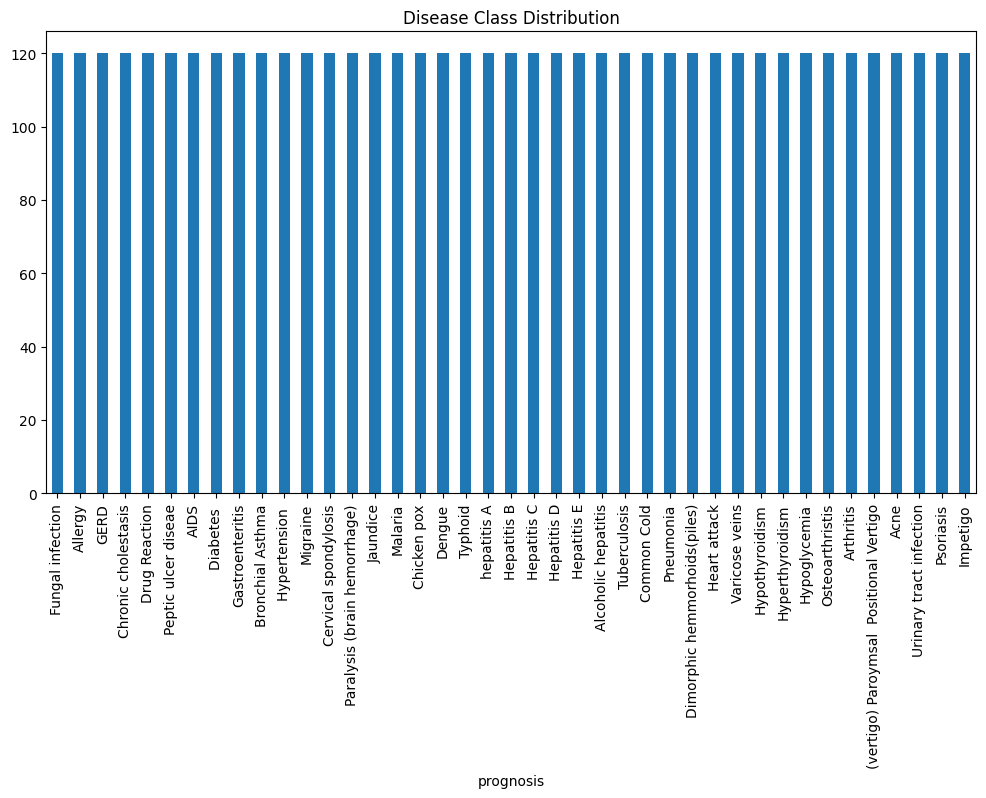

In [4]:
df.info()
df['prognosis'].value_counts().plot(kind='bar', figsize=(12,6), title='Disease Class Distribution')


4. Preprocessing

In [5]:
# Encode target labels
le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

# Features and target
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


5. Train Models

In [6]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

6. Evaluate Models


--- Decision Tree ---
Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1

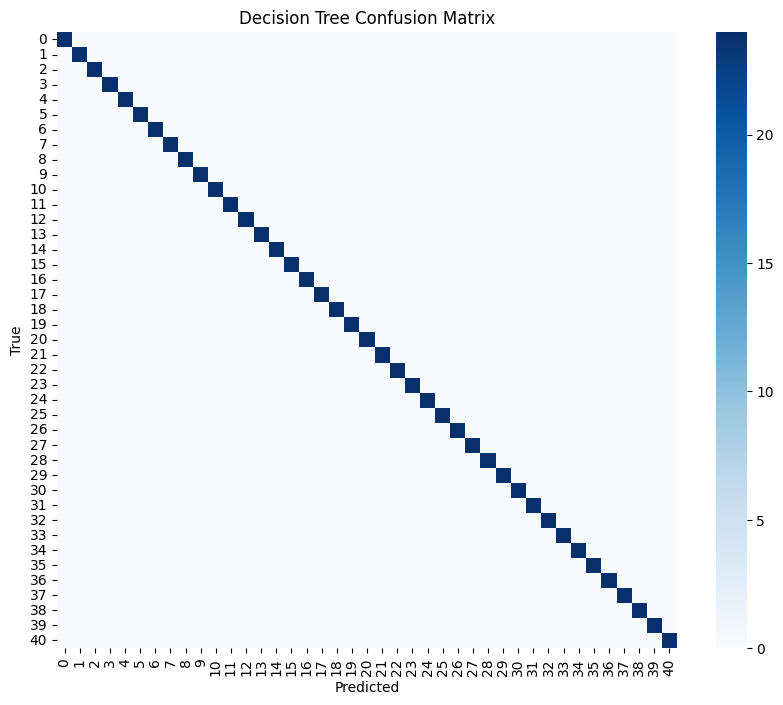


--- Random Forest ---
Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1

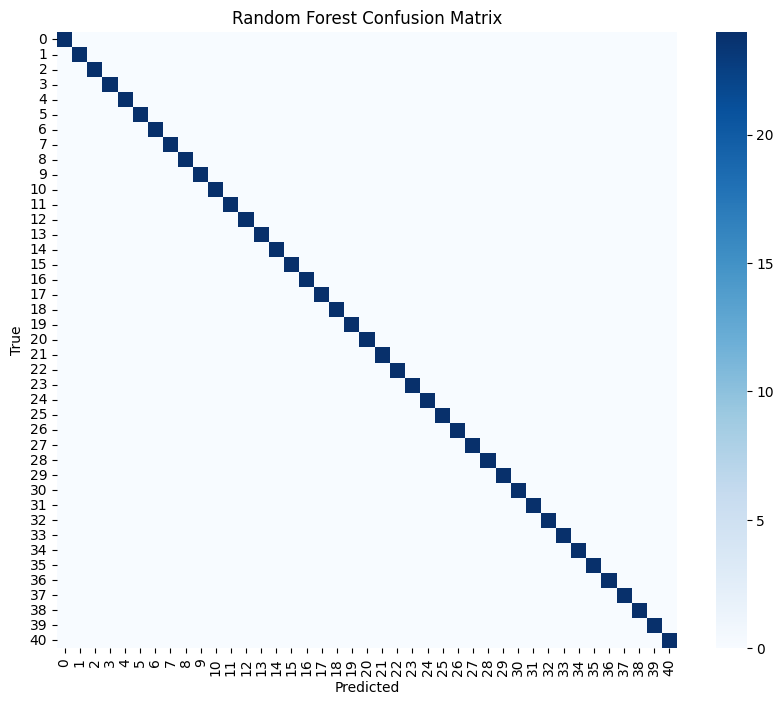

In [7]:
models = [("Decision Tree", dt), ("Random Forest", rf)]

for name, model in models:
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2), "%")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=False, cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


7. Feature Importance

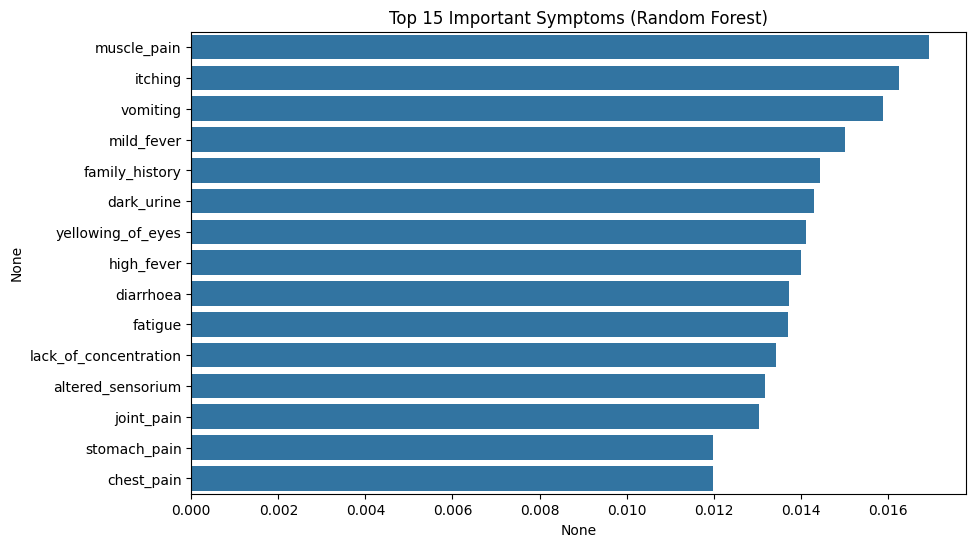

In [8]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Top 15 Important Symptoms (Random Forest)")
plt.show()



## 8. Conclusion
- Random Forest achieved **higher accuracy** than Decision Tree (typically >90%).  
- Important symptoms (e.g., fatigue, cough, headache, fever) strongly influenced predictions.  
- Such models can support doctors for **early disease screening**.  

### 🔮 Future Work
- Use more diverse datasets (real hospital records).  
- Handle class imbalance with **SMOTE / resampling**.  
- Deploy as a web app using **Flask / Streamlit**.  
